In [1]:
import pandas as pd
import numpy as np
import os

In [2]:

import yfinance as yf

In [3]:
tickers =  ['AAPL', 'FB', 'IBM', 'GE', 'MMM', 'BAC', 'COG', 'CAT', 'CVX', 'C', 'DAL', 'MCD', 'MSFT', 'MS', 'MSI', 'NKE',
           'NOV', 'OXY', 'OKE', 'LVS', 'MGM', 'SBUX', 'SYY', 'TEL', 'TSLA', 'WMT', 'DIS', 'WFC', 'ZION']
data = yf.download(tickers = tickers, start = '2016-01-01', end = '2020-12-31')

[*********************100%***********************]  29 of 29 completed


In [4]:
df = data['Close'].loc[: '2018'] # insample test data from 2016 to 2018

In [5]:
df_test = data['Close'].loc['2019':] # out of sample test data from 2019 onwards

In [6]:
df_pct = df.pct_change()

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [8]:
df

,AAPL,BAC,C,CAT,COG,CVX,DAL,DIS,FB,GE,...,NOV,OKE,OXY,SBUX,SYY,TEL,TSLA,WFC,WMT,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,26.315001,16.830000,51.750000,67.959999,17.690001,89.959999,50.689999,105.080002,104.660004,29.951923,...,33.490002,24.660000,67.495064,60.029999,41.000000,64.610001,48.001999,54.360001,61.299999,27.299999
2016-01-04,26.337500,16.430000,51.130001,67.989998,17.590000,88.849998,48.660000,102.980003,102.220001,29.528847,...,34.610001,25.350000,67.295403,58.259998,40.610001,63.439999,44.681999,52.910000,61.459999,26.709999
2016-01-05,25.677500,16.430000,50.860001,67.279999,17.570000,89.610001,48.570000,100.900002,102.730003,29.557692,...,33.619999,25.370001,68.413498,58.650002,40.639999,63.270000,44.686001,52.889999,62.919998,26.420000
2016-01-06,25.174999,16.080000,50.119999,66.220001,16.020000,86.070000,48.930000,100.360001,102.970001,29.086538,...,31.340000,24.219999,65.328751,58.130001,40.189999,62.080002,43.807999,51.880001,63.549999,25.650000
2016-01-07,24.112499,15.500000,47.560001,63.939999,16.580000,83.019997,47.000000,99.500000,97.919998,27.855768,...,30.740000,22.780001,64.150757,56.689999,39.790001,58.790001,43.130001,50.400002,65.029999,24.879999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,36.707500,22.730000,49.259998,116.949997,22.160000,100.989998,47.959999,100.349998,124.059998,6.653846,...,24.430000,50.790001,57.110001,60.560001,59.950001,70.720001,59.077999,43.599998,85.820000,38.509998
2018-12-26,39.292500,24.110001,51.439999,124.760002,23.590000,107.389999,50.410000,105.830002,134.179993,7.105769,...,26.040001,53.700001,60.599998,63.080002,61.230000,73.139999,65.218002,45.590000,90.410004,40.509998
2018-12-27,39.037498,24.370001,51.770000,126.669998,23.770000,109.320000,50.500000,106.519997,134.520004,6.990385,...,26.090000,53.320000,60.759998,63.200001,62.049999,75.209999,63.226002,45.529999,91.589996,40.459999


In [9]:
def calc_n_day_forward_change(df, n):
    return df.pct_change(periods = n).shift(-n) / n

In [10]:
def calc_m_back_n_forward(df, m, n):
    return df.pct_change(periods = m) / m, calc_n_day_forward_change(df, n)

In [11]:
ms = [1, 3, 5, 10, 15, 20, 30, 60, 90]
ns = [1, 3, 5, 10, 15, 20, 30, 60, 90]
result_params = pd.DataFrame(index=ms, columns=ns)
result_tstats = pd.DataFrame(index = ms, columns = ns)
for m in ms:
    for n in ns:
        df_m, df_n = calc_m_back_n_forward(df, m, n)
        df_m = (df_m - df_m.mean()) / df_m.std()
        df_n = (df_n - df_n.mean()) / df_n.std()
        df_reg = pd.DataFrame({'x' : df_m.stack(), 'y' : df_n.stack()})
        mod = smf.ols('y~x-1', data = df_reg, missing='drop').fit()
        result_params.loc[m, n] = mod.params['x']
        result_tstats.loc[m, n] = mod.tvalues['x']

In [12]:
result_params.astype(float).round(3)

,1,3,5,10,15,20,30,60,90
1,-0.012,-0.007,-0.022,-0.021,-0.034,-0.023,-0.019,-0.034,-0.032
3,-0.008,-0.026,-0.032,-0.038,-0.055,-0.031,-0.034,-0.055,-0.054
5,-0.029,-0.040,-0.050,-0.055,-0.063,-0.038,-0.044,-0.068,-0.066
10,-0.031,-0.051,-0.061,-0.065,-0.050,-0.055,-0.045,-0.082,-0.083
15,-0.042,-0.061,-0.055,-0.039,-0.053,-0.044,-0.024,-0.081,-0.086
20,-0.019,-0.028,-0.031,-0.047,-0.046,-0.036,-0.025,-0.079,-0.096
30,-0.021,-0.029,-0.024,-0.020,-0.007,-0.010,-0.012,-0.082,-0.118
60,-0.015,-0.022,-0.021,-0.025,-0.032,-0.036,-0.049,-0.120,-0.174
90,-0.015,-0.023,-0.022,-0.023,-0.027,-0.041,-0.070,-0.156,-0.186


In [13]:
#found the highest correlation parameter is for 90 day looking back and 90 day forward looking periods.

opt_m = 90
opt_n = 90

df_m, df_n = calc_m_back_n_forward(df, opt_m, opt_n)
df_m = df_m
df_n = df_n 
df_reg = pd.DataFrame({'x' : df_m.stack(), 'y' : df_n.stack()})
mod = smf.ols('y~x', data = df_reg, missing='drop').fit() # recalibrate the parameter without scaling

In [14]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.91
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           0.000956
Time:                        23:42:51   Log-Likelihood:                 84411.
No. Observations:               16675   AIC:                        -1.688e+05
Df Residuals:                   16673   BIC:                        -1.688e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005   1.32e-05     38.858      0.000       0.000       0.001
x              0.0255      0.008      3.304      0.001       0.010       0.041
==============================================================================
Omnibus:                      549.606   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.508
Skew:                           0.237   Prob(JB):                    2.14e-238
Kurtosis:                       4.162   Cond. No.                         651.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
raw_alphas = df_m * 0.025

In [16]:
#raw_alpha.to_excel('raw_alpha.xlsx')

In [17]:
def alpha_2_holdings(alphas):
    total = alphas.abs().sum(axis=1)
    holding = alphas.divide(total, axis=0)
    return holding

In [18]:
def alpha_2_holdings_market_neutral(alphas):
    
    alphas_demean = alphas.subtract(alphas.mean(axis=1), axis=0)
    holdings = alphas_demean.copy(deep=True)
    holdings[holdings>0] = alphas_demean[alphas_demean >0].divide( alphas_demean[alphas_demean >0].sum(axis=1), axis=0) / 2
    holdings[holdings<0] = alphas_demean[alphas_demean <0].divide( alphas_demean[alphas_demean <0].sum(axis=1), axis=0) / 2 * -1
    return holdings

In [19]:
holdings = alpha_2_holdings_market_neutral(raw_alphas)
daily_change = holdings.rolling(window=opt_n).mean() * df.pct_change(periods=1).shift(-1)
total_daily_change = daily_change.sum(axis=1)
total_cum_change = (total_daily_change+1).cumprod()

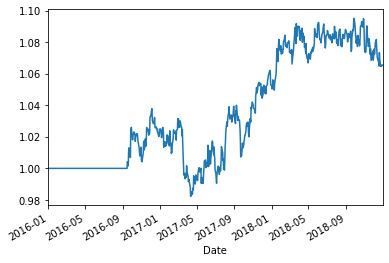

In [25]:
total_cum_change.plot()

In [21]:
# out sample test

In [22]:
opt_m_test = 90
opt_n_test = 90

df_m_test, df_n_test = calc_m_back_n_forward(df_test, opt_m_test, opt_n_test)
raw_alpha_test = df_m_test * 0.025
alpha_demean_test = raw_alpha_test - raw_alpha_test.mean()
#holdings = pd.DataFrame(index=alpha_demean.index, columns = alpha_demean.columns)
holdings_test = alpha_2_holdings_market_neutral(raw_alpha_test)
daily_change_test = holdings_test.rolling(window=opt_m_test).mean() * df_test.pct_change(periods=1).shift(-1)
total_daily_change_test = daily_change_test.sum(axis=1)

In [23]:
total_cum_change_test = (total_daily_change_test+1).cumprod()

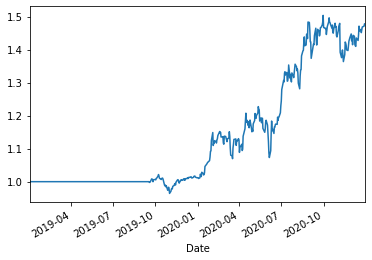

In [24]:
total_cum_change_test.plot()